In [46]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller

In [61]:
case1 = pd.read_csv("case1.csv", squeeze=True)
case1

0     7179.673
1     4396.311
2     6128.099
3     4085.163
4     6075.881
5     5818.546
6     5325.384
7     6753.340
8     5819.326
9     4729.037
10    7760.014
11    3550.604
12    7146.353
13    5567.403
14    4979.883
15    3700.331
16    6474.368
17    4287.689
18    5603.204
19    6995.013
20    5899.916
21    6531.124
22    4884.638
23    4023.774
24    8661.052
25    3537.571
26    5130.761
27    6837.134
28    5008.219
29    4658.270
30    5554.491
31    6294.987
32    6534.426
33    5163.339
34    6496.257
35    5543.012
36    4195.582
37    7603.366
38    5473.730
39    4940.590
40    5310.179
41    4837.537
42    7235.870
43    5294.008
44    4558.374
45    6763.432
46    4674.734
47    5390.025
48    6728.527
49    6383.499
50    4579.823
51    4883.788
52    6282.843
53    7040.051
54    3364.572
55    6910.947
56    2801.375
57    8316.074
58    4889.390
59    4232.441
Name: demand, dtype: float64

timeseries plot

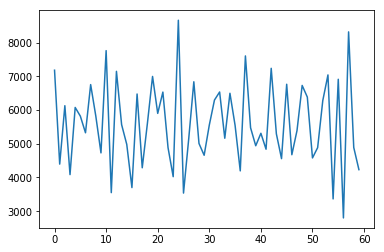

In [62]:
case1.plot()

cek stasioner dalam rata-rata

In [107]:
X = case1.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.893559
p-value: 0.000036
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599


p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
adf statistic > critical values

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.



plot ACF dan PACF

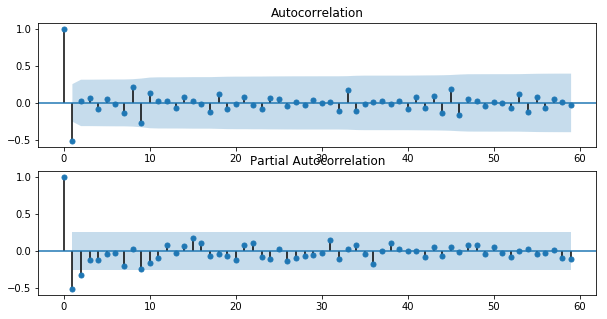

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(case1, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(case1, ax=pyplot.gca())
pyplot.show()

ARIMA MODELING

In [109]:
from statsmodels.tsa.arima_model import ARIMA
X = case1.values
model = ARIMA(X, order=(2,0,1))
model_fit = model.fit()

C:\Users\wildan059245\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\wildan059245\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [75]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   60
Model:                     ARMA(2, 1)   Log Likelihood                -496.120
Method:                       css-mle   S.D. of innovations            914.246
Date:                Fri, 06 Jul 2018   AIC                           1002.239
Time:                        14:28:09   BIC                           1012.711
Sample:                             0   HQIC                          1006.335
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5615.2673      7.854    714.973      0.000    5599.874    5630.660
ar.L1.y        0.0532      0.132      0.403      0.688      -0.205       0.312
ar.L2.y        0.1092      0.133      0.820      0.4

C:\Users\wildan059245\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\wildan059245\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


cek whitenoise dari plot residual errors

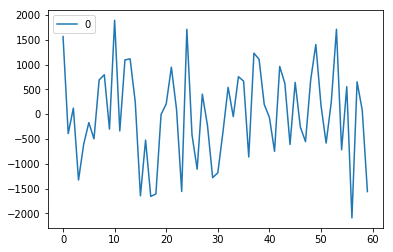

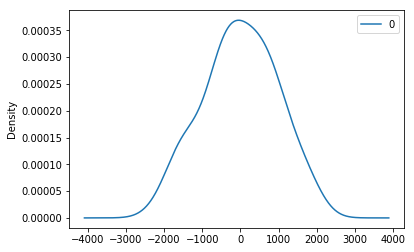

                 0
count    60.000000
mean     -4.059145
std     953.172495
min   -2093.076838
25%    -589.830333
50%      35.725730
75%     670.156178
max    1893.267465


In [82]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

white noise dari plot acf dan pacf => untuk melihat apakah model sudah bagus atau belum

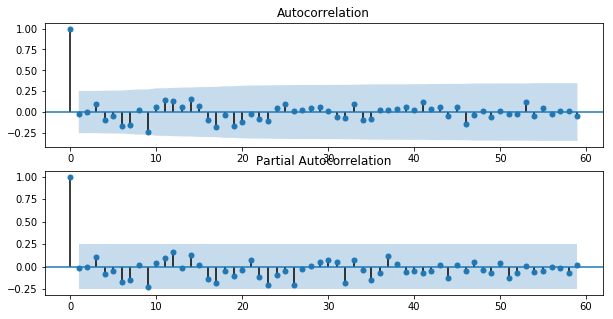

In [83]:
pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

membuat hasil forecasting 10 data kedepan

In [88]:
forecast = model_fit.forecast(steps=10)[0]

selang kepercayaan 95%

In [98]:
ci = model_fit.forecast(steps=10)[2]
ci_low = ci[:,0]
ci_up = ci[:,1]

In [93]:
temp = pd.Series(forecast, index=range(61, 71))

In [103]:
temp2 = pd.Series(ci_low, index=range(61, 71))
temp3 = pd.Series(ci_up, index=range(61, 71))

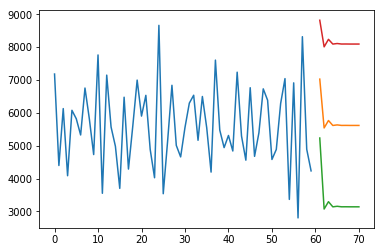

In [105]:
case1.plot()
temp.plot()
temp2.plot()
temp3.plot()